In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

# vector generator
def generatevector(n):
    if n == 1:
        u = np.array([0, 0])
    elif n == 2:
        u = np.array([3, 0])
    else:
        u = np.array([0, 3])
    return np.random.multivariate_normal(mean = u, cov = np.identity(2))
#generate observations
def generateObs():
    data = []
    for i in range(500):
        test = np.random.choice(a = [1, 2, 3], p = [0.2,0.5,0.3])
        data.append(generatevector(test))
        
    return np.array(data)


In [143]:
data = generateObs()

In [144]:
#initialized u 
u = []
for i in range(5):
    rand = random.randint(0, 499)
    u.append(data[rand])


In [145]:
def k_means(k, data):
    u_k = np.array(u[:k])
    result = []
    for i in range(20):
        cluster = [[] for _ in range(k)]
        obj = 0
        
        #assignment step:
        for point in data:
            distance = np.sum((point - u_k)**2, axis = 1)
            index = int(np.min((np.argmin(distance))))
            cluster[index].append(point)
            
        #update step:
        for j in range(k):
            c = np.array(cluster[j])
            u_k[j] = np.sum(c, axis = 0)/c.shape[0]
            
        for t in range(k):
            c = np.array(cluster[t])
            obj += np.sum(np.sum((c - u_k[t]) ** 2, axis = 0))

        result.append(obj)
    return result, cluster

        

In [146]:
def question1():
    result = []
    for k in range(2, 6):
        obj, cluster = k_means(k, data)
        result.append(obj)
    return result

In [147]:
obj, cluster = k_means(3, data)

In [148]:
result1 = question1()

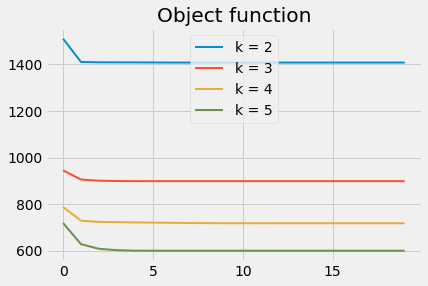

In [149]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
x = range(20)
k2 = ax.plot(x, result1[0], label = 'k = 2', linewidth=2)
k3 = ax.plot(x, result1[1], label = 'k = 3', linewidth=2)
k4 = ax.plot(x, result1[2], label = 'k = 4', linewidth=2)
k5 = ax.plot(x, result1[3], label = 'k = 5', linewidth=2)
ax.set_title("Object function")
plt.legend()
plt.show()

In [150]:
#question 2
result2, cluster_3 = k_means(3, data)
result2, cluster_5 = k_means(5, data)

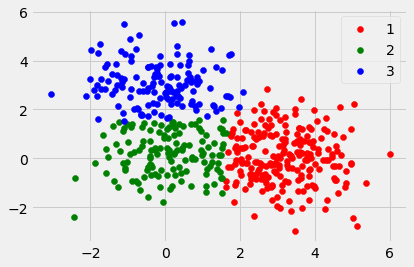

In [151]:
fig, ax = plt.subplots()
dic = {0:'red',1:'green',2:'blue'}
for index in dic:
    x = np.array(cluster_3[index])[:,0]
    y = np.array(cluster_3[index])[:,1]
    ax.scatter(x, y, c=dic[index], label=index + 1)

ax.legend()
ax.grid(True)

plt.show()

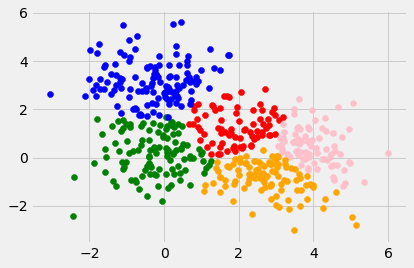

In [152]:
fig, ax = plt.subplots()
dic = {0:'red',1:'green',2:'blue', 3:'pink', 4:'orange'}
for index in dic:
    x = np.array(cluster_5[index])[:,0]
    y = np.array(cluster_5[index])[:,1]
    ax.scatter(x, y, c=dic[index], label=index + 1)

#ax.legend()
ax.grid(True)

plt.show()